In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!dir

 Volume in drive F is New Volume
 Volume Serial Number is 6A7D-E31B

 Directory of F:\nordic Internship\projects\Success_prediction_of_app\notebooks

29-09-2021  04:53 PM    <DIR>          .
29-09-2021  04:53 PM    <DIR>          ..
29-09-2021  04:53 PM    <DIR>          .ipynb_checkpoints
29-09-2021  04:52 PM           127,917 1.Playstore-cleaning.ipynb
29-09-2021  04:53 PM           551,230 2.Playstore_visualization.ipynb
24-09-2021  04:52 PM           746,023 3.Playstore-EDA&response.ipynb
21-09-2021  09:12 PM           126,823 4.Playstore-regressionModels.ipynb
22-09-2021  10:09 AM           817,183 5.Playstore-featureSelection.ipynb
24-09-2021  06:20 PM           338,730 6.Playstore-Regression_catboost.ipynb
               6 File(s)      2,707,906 bytes
               3 Dir(s)  33,633,050,624 bytes free


In [3]:
cd ..

F:\nordic Internship\projects\Success_prediction_of_app


In [4]:
data = pd.read_csv('google-playstore-apps/Google-Playstore-Cleaned.csv.gz',compression='gzip')

In [5]:
data.head()

,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Min_Downloads,Average_Downloads
0,Adventure,True,0.0,10.0,7.1,19,19,Everyone,False,False,10,12
1,Tools,True,0.0,2.9,5.0,16,4,Everyone,True,False,5000,6331
2,Productivity,True,0.0,3.7,4.0,25,25,Everyone,False,False,50,54
3,Communication,True,0.0,1.8,4.0,36,35,Everyone,True,False,10,14
4,Tools,True,0.0,6.2,4.1,19,34,Everyone,False,False,100,289


In [6]:
data.dtypes

Category              object
Free                    bool
Price                float64
Size                 float64
Min_Version          float64
Released_Before        int64
Updated_Before         int64
Content               object
Ad_Support              bool
Inapp_Purchase          bool
Min_Downloads          int64
Average_Downloads      int64
dtype: object

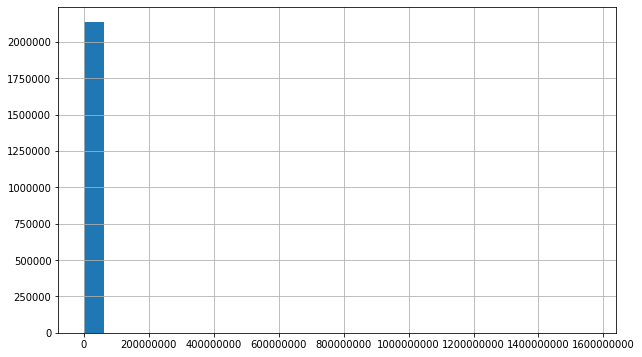

In [7]:
plt.figure(figsize=(10,6))
data['Average_Downloads'].hist(bins = 25)
plt.ticklabel_format(useOffset=False,style='Plain')
plt.show()

The newly created column here shows that, there may be more **Outliers** and the ```min max``` values might be **too far away**

### Splitting numerical and categorical values

In [8]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O' and data[feature].dtypes != 'bool']
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
bool_features = [feature for feature in data.columns if data[feature].dtypes == 'bool']

numerical_features.remove('Min_Downloads')
categorical_features.append('Min_Downloads')

print(numerical_features,bool_features,categorical_features)

['Price', 'Size', 'Min_Version', 'Released_Before', 'Updated_Before', 'Average_Downloads'] ['Free', 'Ad_Support', 'Inapp_Purchase'] ['Category', 'Content', 'Min_Downloads']


### Splitting Continuous and Discreate values from numerical values

In [9]:
discreate_feature = ['Min_Version']
continuous_feature_w_price = [features for features in numerical_features if features not in discreate_feature]
continuous_feature_wo_price = ['Size', 'Released_Before', 'Updated_Before', 'Average_Downloads']
print(continuous_feature_w_price,continuous_feature_wo_price,discreate_feature)

['Price', 'Size', 'Released_Before', 'Updated_Before', 'Average_Downloads'] ['Size', 'Released_Before', 'Updated_Before', 'Average_Downloads'] ['Min_Version']


In [10]:
data

,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Min_Downloads,Average_Downloads
0,Adventure,True,0.0,10.0,7.1,19,19,Everyone,False,False,10,12
1,Tools,True,0.0,2.9,5.0,16,4,Everyone,True,False,5000,6331
2,Productivity,True,0.0,3.7,4.0,25,25,Everyone,False,False,50,54
3,Communication,True,0.0,1.8,4.0,36,35,Everyone,True,False,10,14
4,Tools,True,0.0,6.2,4.1,19,34,Everyone,False,False,100,289
...,...,...,...,...,...,...,...,...,...,...,...,...
2135250,Education,True,0.0,10.0,4.1,40,33,Everyone,True,False,1000,1490
2135251,Education,True,0.0,44.0,4.1,44,43,Everyone,False,False,100,265
2135252,Education,True,0.0,29.0,5.0,37,37,Everyone,False,False,100,151
2135253,Music & Audio,True,0.0,10.0,5.0,61,4,Everyone,True,False,1000,1817


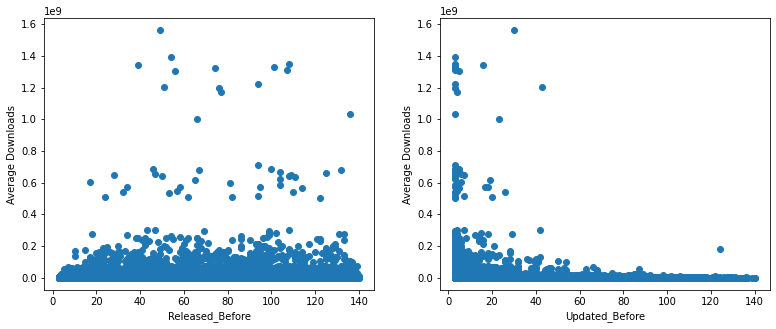

In [11]:
fig = plt.figure(figsize=(13,5))

for feature,i in zip(['Released_Before','Updated_Before'], range(1,3)):
    ax = fig.add_subplot(1,2,i)
    dataset = data.copy()
    ax.scatter(data[feature],data['Average_Downloads'])
    ax.set_xlabel(feature)
    ax.set_ylabel("Average Downloads")

plt.show()

As you can see in the both the plots, Data are acumulated towards the zeros of Average Downloads. 
- This is because, 
    - There may be more outliers 
    - They are to be scaled in some manner so that they give normal distribution

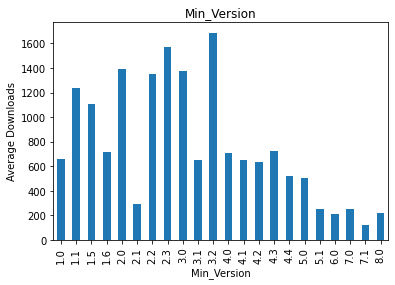

In [12]:
for feature in discreate_feature:
    dataset = data.copy()
    dataset.groupby(feature)['Average_Downloads'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Average Downloads')
    plt.title(feature)
    plt.show()

This graph doesn't give clean results, but if we see carefully the Average Downloads tends to decrease when the minimum version of a mobile app increases.
- Means, the app which are launch from most basic version tend to have more downloads 
- which means, most people still use outdated phones (which has lower android versions), so that they will be able to use the app published

In [13]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Category and number of categories are 48
The feature is Content and number of categories are 6
The feature is Min_Downloads and number of categories are 19


There are two major categorical columns
- the column with 6 unique values can be manipulated easily through **One Hot Encoding**
- the column with 48 unique values are to be managed in different way

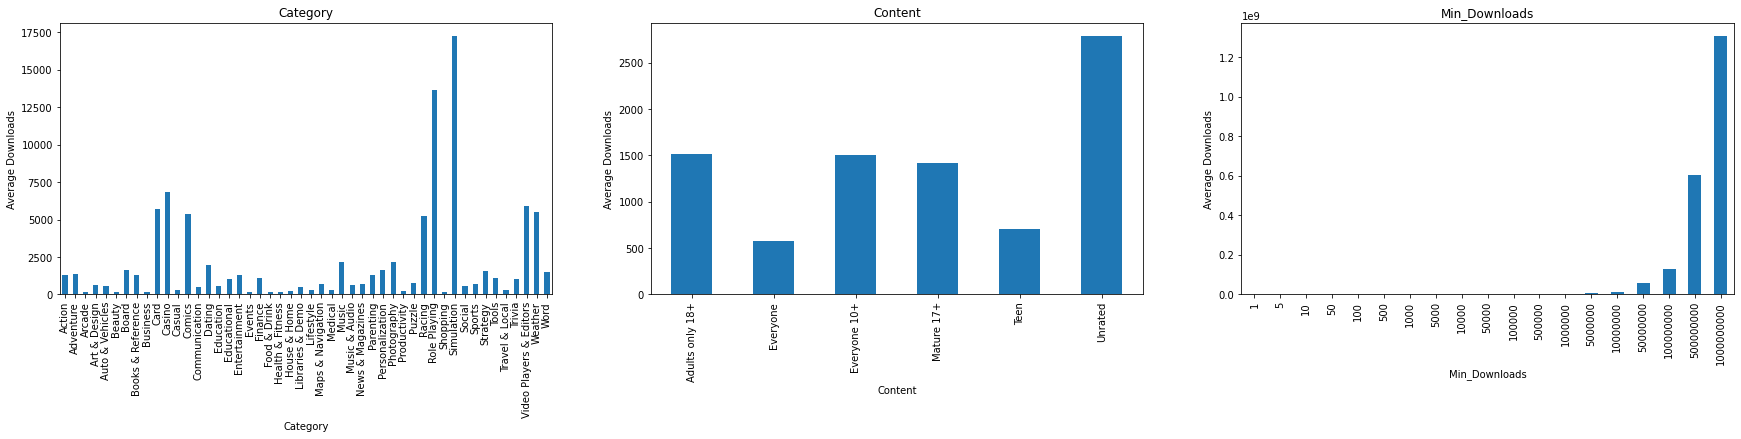

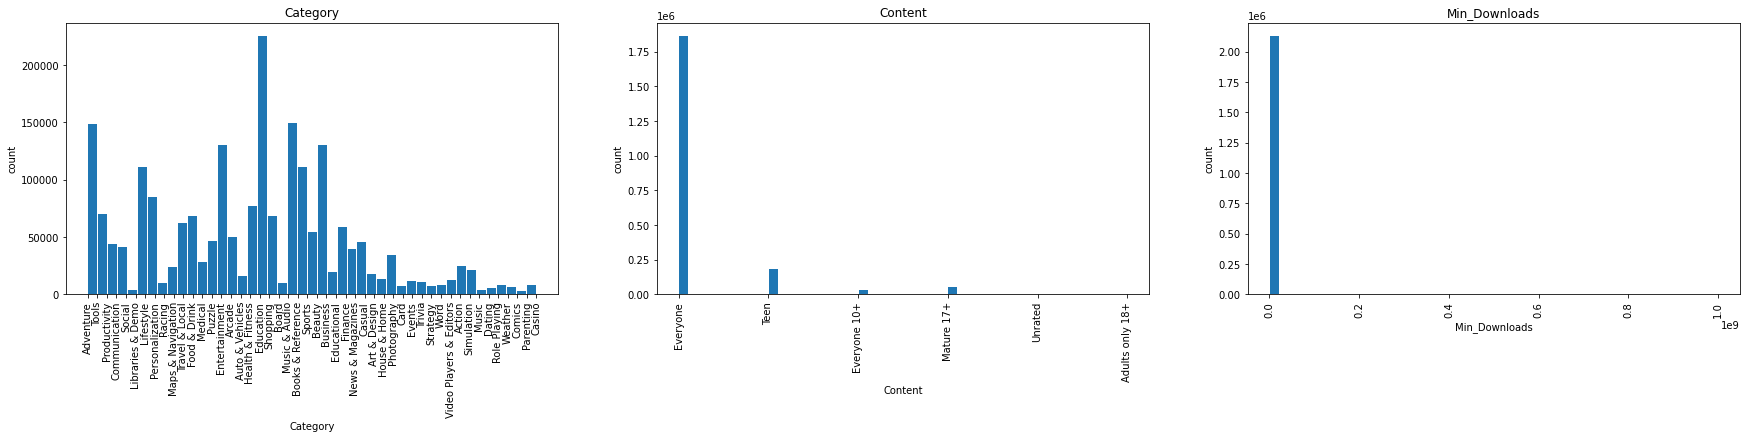

In [14]:
fig = plt.figure(figsize=(30,5))
for feature,i in zip(categorical_features, range(1,4)):
    ax = fig.add_subplot(1,3,i)
    dataset = data.copy()
    dataset.groupby(feature)['Average_Downloads'].median().plot.bar() #Plot against average downloads (median) with categorical features
    ax.set_xlabel(feature)
    ax.set_ylabel("Average Downloads")
    ax.set_title(feature)
    
fig = plt.figure(figsize=(30,5))
for feature,i in zip(categorical_features, range(1,4)):
    ax = fig.add_subplot(1,3,i)
    dataset = data.copy()
    dataset[feature].hist(bins=45,rwidth = 0.9)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.grid(False)
    ax.xaxis.set_tick_params(rotation =90)
    ax.set_title(feature)

plt.show()

Considering the first two plots 
- The category **Simulation** is having abnormally high **average downloads**, but its count is considerably low as per the below histograms
- the Content on **Everyone** is having low Average downloads but the count is unexpectedly high

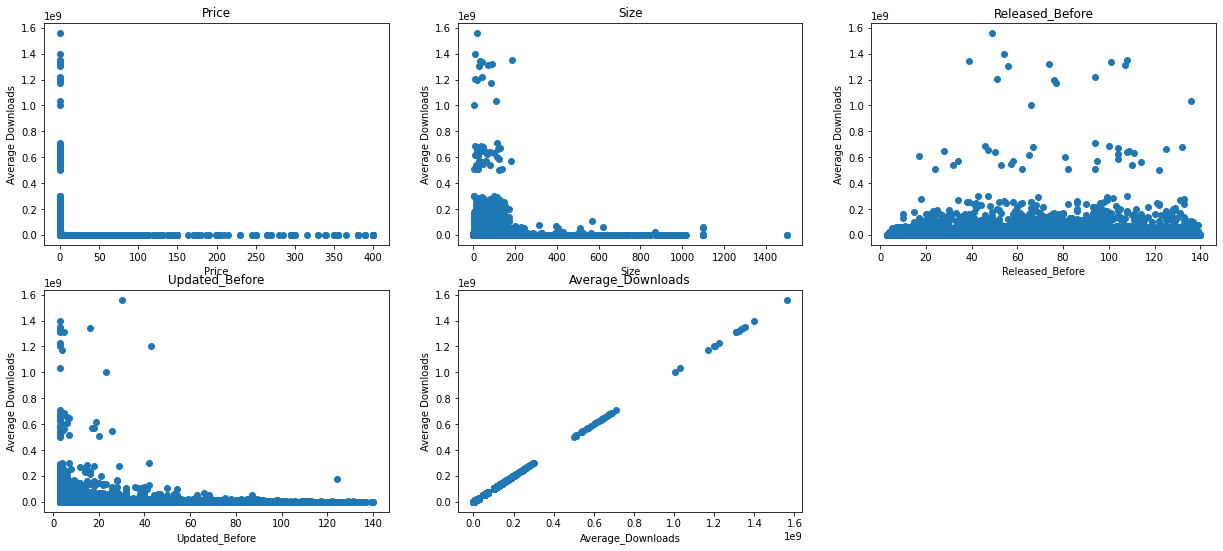

In [15]:
fig = plt.figure(figsize=(21,9))
for feature,i in zip(continuous_feature_w_price, range(1,7)):
    ax = fig.add_subplot(2,3,i)
    dataset = data.copy()
    ax.scatter(dataset[feature],dataset['Average_Downloads'])
    ax.set_xlabel(feature)
    ax.set_ylabel("Average Downloads")
    ax.set_title(feature)

plt.show()

As we discussed above every column with respect to Average Downloads is clustered around zero of Average Downloads
   - but exceptionally Average Downloads with respect to Rating_sum **both** are clustered at zero which means there is lots of outliers in Rating Sum also like Average Downloads 

### Plotting Distribution graphs for **original Data** vs **logarithm Transformed Data**

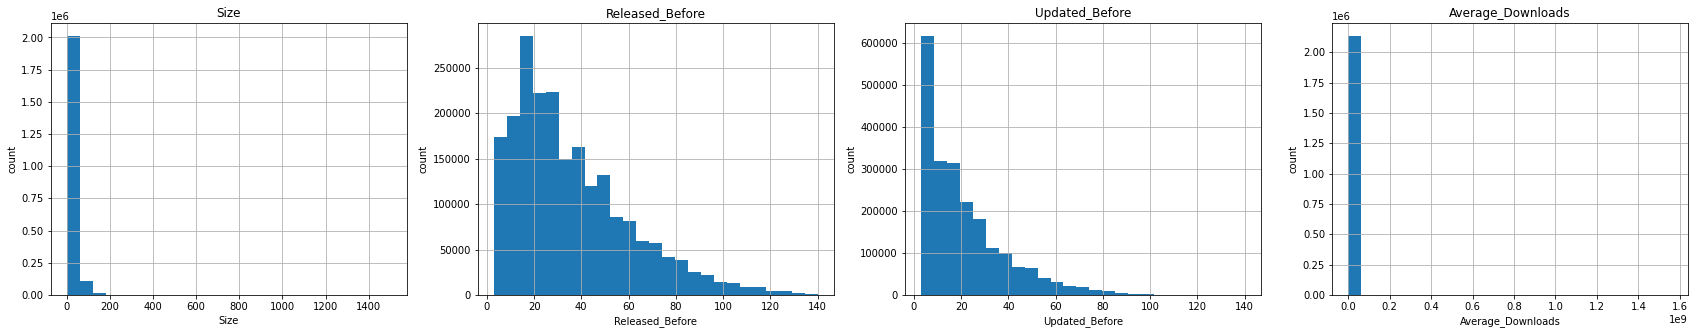

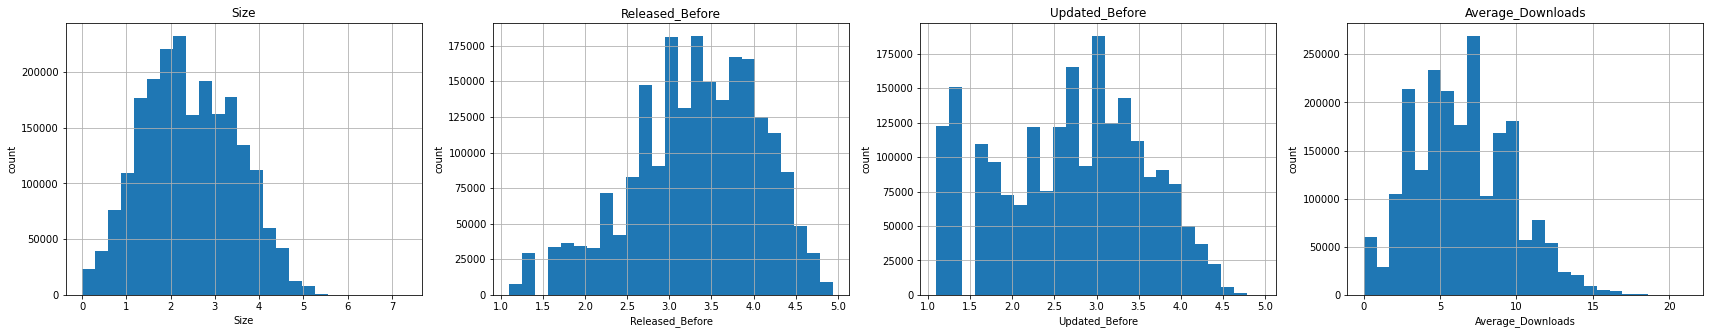

In [16]:
fig = plt.figure(figsize=(37,5))

for feature,i in zip(continuous_feature_wo_price, range(1,7)):
    ax = fig.add_subplot(1,5,i)
    dataset = data.copy()
    dataset[feature].hist(bins=25)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.set_title(feature)

plt.show()
fig = plt.figure(figsize=(37,5))

for feature,i in zip(continuous_feature_wo_price, range(1,7)):
    ax = fig.add_subplot(1,5,i)
    dataset = data.copy()
    dataset[feature]=np.log(dataset[feature])
    dataset[feature].hist(bins=25)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.set_title(feature)

plt.show()

- The first row of plots mean the distribution of columns *without log* transformtion
    - Almost every plot is left skewed and spesifically **Size, Rating_Sum and Average_Downloads** are completly left
        - which again indicates the possibility of outliers
- The second row of plots mean the distribution of columns *with log* transformtion
    - now it gives a good looking plot compare to before, but still some are not perfect **normal distribution**
    - some of them are skewed which is a direct indication of presence of **outliers**

## Box plot without any Transformation

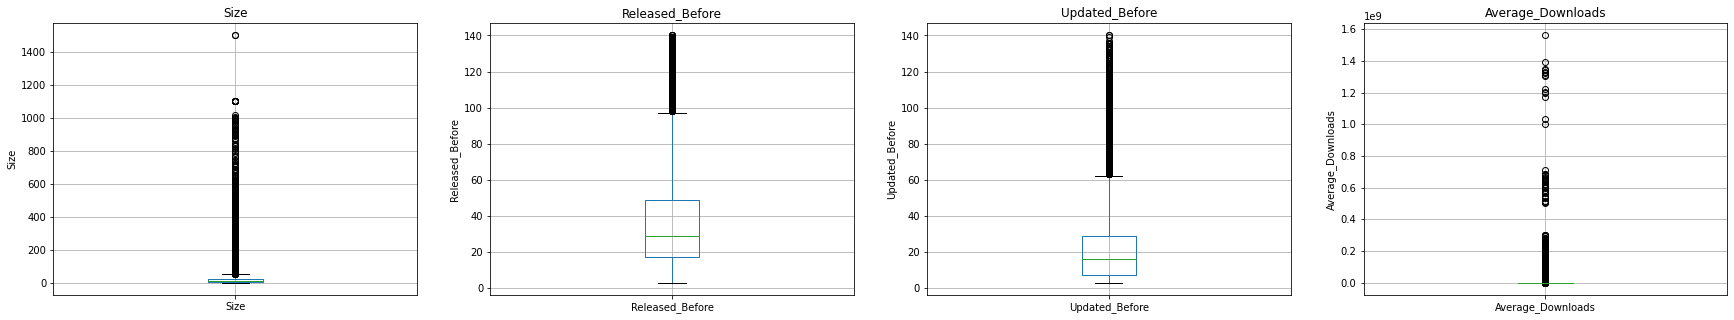

In [17]:
#np.warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(30,5))

for feature,i in zip(continuous_feature_wo_price, range(1,7)):
    ax = fig.add_subplot(1,4,i)
    dataset = data.copy()
    dataset.boxplot(column=feature)
    ax.set_ylabel(feature)
    ax.set_title(feature)
    
plt.show()

Every box plot seem to have a lot of skewness, 
- There are a whole lot of outliers, from which if we twnd to remove them we are going to suffer more data loss
- which is a clear indication for transformation of data

## Box plot with Transformation

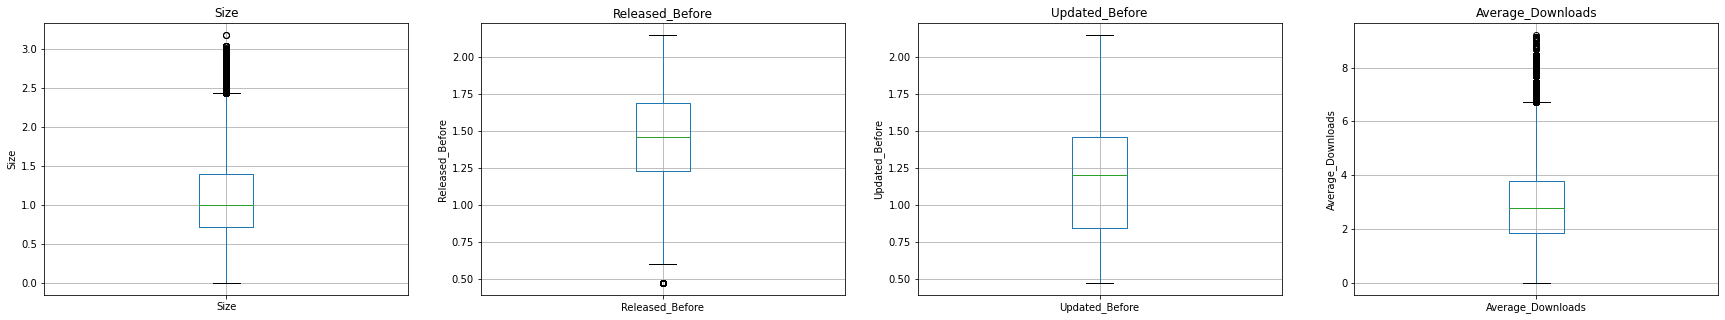

In [18]:
#np.warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(30,5))

for feature,i in zip(continuous_feature_wo_price, range(1,7)):
    ax = fig.add_subplot(1,4,i)
    dataset = data.copy()
    dataset[feature]=np.log10(dataset[feature])
    dataset.boxplot(column=feature)
    ax.set_ylabel(feature)
    ax.set_title(feature)
    
plt.show()

Plotting every continuous featured columns after transformation:- 
- Obviously we got hold of more outliers than before **log10 tranformation**
- It is clear that **Size, Rating_Sum and Average_Downloads** have some of outliers
- Released_Before column too have a little of them

# Outlier Detection and Elimination

In [19]:
def Outlier(dataset,feature):
    shape1 = dataset.shape[0]                                 #taking the shape before removing outliers to keep track of no of outliers
    dataset[feature]=np.log(dataset[feature])                 #Applying log transformation
    lst = sorted(dataset[feature])                            #taking a list of sorted values of that column
    
    quantile1, quantile3 = np.percentile(lst,[25,75])         #obtaining 25th and 75th percentile
    iqr_value = quantile3 - quantile1                         #finding inter-quartile value(difference)
    
    #obtaining lower bound and upper bound
    lower_bound_val = quantile1 - (1.5 * iqr_value)
    upper_bound_val = quantile3 + (1.5 * iqr_value)
    
    dataset.drop(dataset[(dataset[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
    dataset.drop(dataset[(dataset[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value
    
    return shape1-(dataset.shape[0])

Executing the function by keeping track of shape and no of outliers in each column

In [20]:
data1 = data.copy()
print(data1.shape)
for feature in continuous_feature_wo_price:
    shape1 = Outlier(data1,feature)
    print('\n {} has {} outliers'.format(feature, shape1))
data1.shape

(2135255, 12)

 Size has 479 outliers

 Released_Before has 7462 outliers

 Updated_Before has 0 outliers

 Average_Downloads has 11221 outliers


(2116093, 12)

It has removed all the outliers
- the wieghts are similar to what we saw in the box plot above

In [21]:
data1.reset_index(drop=True,inplace=True)
data1

,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Min_Downloads,Average_Downloads
0,Adventure,True,0.0,2.302585,7.1,2.944439,2.944439,Everyone,False,False,10,2.484907
1,Tools,True,0.0,1.064711,5.0,2.772589,1.386294,Everyone,True,False,5000,8.753213
2,Productivity,True,0.0,1.308333,4.0,3.218876,3.218876,Everyone,False,False,50,3.988984
3,Communication,True,0.0,0.587787,4.0,3.583519,3.555348,Everyone,True,False,10,2.639057
4,Tools,True,0.0,1.824549,4.1,2.944439,3.526361,Everyone,False,False,100,5.666427
...,...,...,...,...,...,...,...,...,...,...,...,...
2116088,Education,True,0.0,2.302585,4.1,3.688879,3.496508,Everyone,True,False,1000,7.306531
2116089,Education,True,0.0,3.784190,4.1,3.784190,3.761200,Everyone,False,False,100,5.579730
2116090,Education,True,0.0,3.367296,5.0,3.610918,3.610918,Everyone,False,False,100,5.017280
2116091,Music & Audio,True,0.0,2.302585,5.0,4.110874,1.386294,Everyone,True,False,1000,7.504942


## Box plots and Histograms

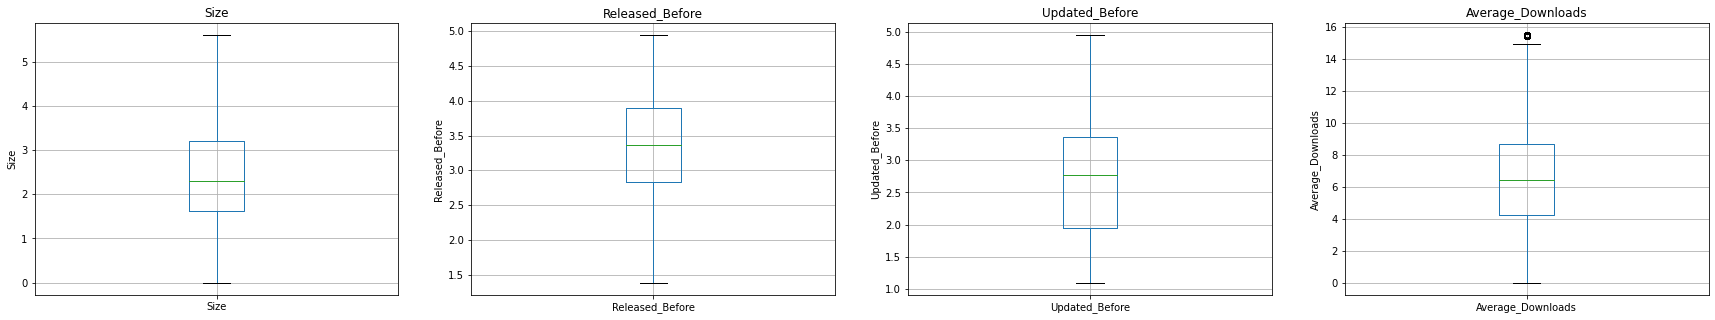

In [22]:
#np.warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(30,5))

for feature,i in zip(continuous_feature_wo_price, range(1,7)):
    ax = fig.add_subplot(1,4,i)
    dataset = data1.copy()
    dataset.boxplot(column=feature)
    ax.set_ylabel(feature)
    ax.set_title(feature)
    
plt.show()

- After applying transformation and removing outliers we still have some outliers(which we'll handle later)
- Now the box plot seem clear and tidy compared to before

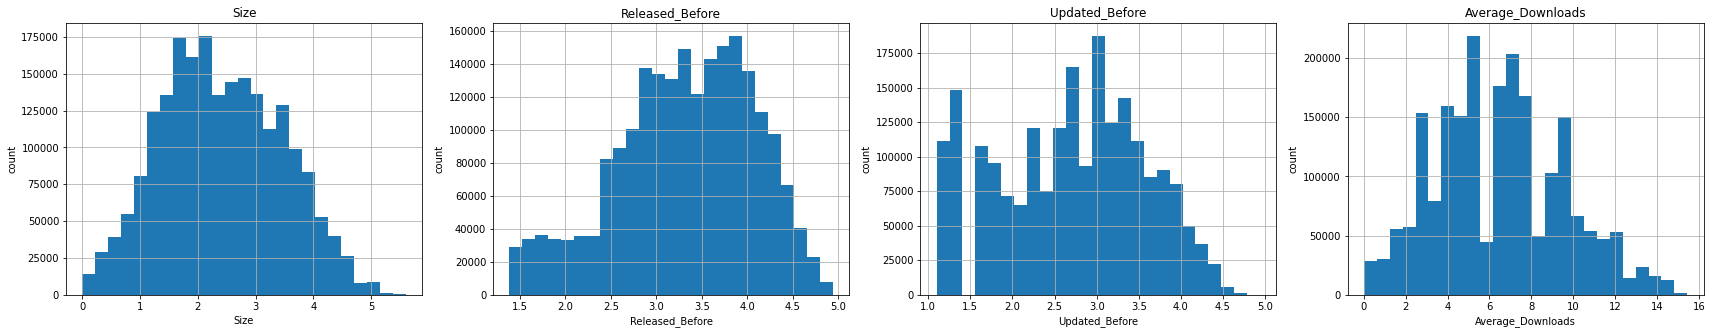

In [23]:
fig = plt.figure(figsize=(37,5))

for feature,i in zip(continuous_feature_wo_price, range(1,7)):
    ax = fig.add_subplot(1,5,i)
    dataset = data1.copy()
    dataset[feature].hist(bins=25)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.set_title(feature)

plt.show()

Now this distribution diagram is a kind of complete one because, it has undergone **log transformation** and also **outlier elimination**
- Almost everything is as expected(Normal distribution)

## Price column manipulation

- As we saw Earlier Price column is highly skewed.
- So it is not fair enough to transform or remove outliers from the whole feature .
- instead we will take the rows which has price not equal to 0 and perform transformation and outlier elimination .
- finally we will merge it into the original feature.
    - which will  finally have its all non zero values transformed and zeros remaining the same.
-Atlast we scale the together.

In [24]:
price = data1[data1['Price'] != 0]
price

,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Min_Downloads,Average_Downloads
249,Tools,False,1.990000,0.470004,4.1,3.496508,3.367296,Everyone,False,False,10000,10.001612
267,Sports,False,4.990000,3.401197,7.1,4.007333,2.197225,Everyone,False,False,10000,9.230437
501,Education,False,2.990000,2.833213,4.4,3.988984,3.988984,Everyone,False,False,1,0.000000
559,Simulation,False,0.990000,3.583519,4.4,2.302585,1.945910,Everyone,True,True,10000,9.730443
574,Education,False,1.990000,3.401197,2.3,4.219508,4.219508,Everyone,False,False,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2115805,Education,False,18.903596,4.454347,4.4,3.583519,2.197225,Everyone,False,False,1000,7.294377
2115806,Education,False,5.490000,2.397895,4.4,3.828641,3.367296,Everyone,False,False,5,1.791759
2115857,Personalization,False,1.490000,1.945910,4.1,4.663439,4.430817,Everyone,False,False,1000,7.152269
2115873,Role Playing,False,7.990000,3.850148,2.3,4.304065,4.304065,Teen,True,True,5000,8.674368


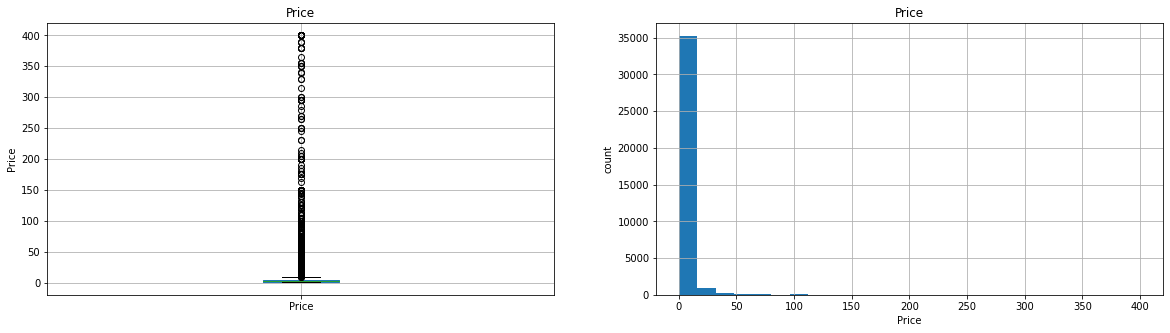

In [25]:
#np.warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,2,1)
price2 = price.copy()
price2.boxplot(column='Price')
ax.set_ylabel('Price')
ax.set_title("Price")

ax = fig.add_subplot(1,2,2)
price2 = price.copy()
price2[price2['Price'] !=0]['Price'].hist(bins=25)
ax.set_xlabel('Price')
ax.set_ylabel("count")
ax.set_title('Price')

plt.show()

proving that the feature skewed and contains outliers

In [26]:
price1 = price.copy()
print(price1.shape)
shape1 = Outlier(price1,'Price')
print('\n {} has {} outliers'.format(feature, shape1))
price1.shape

(36782, 12)

 Average_Downloads has 504 outliers


(36278, 12)

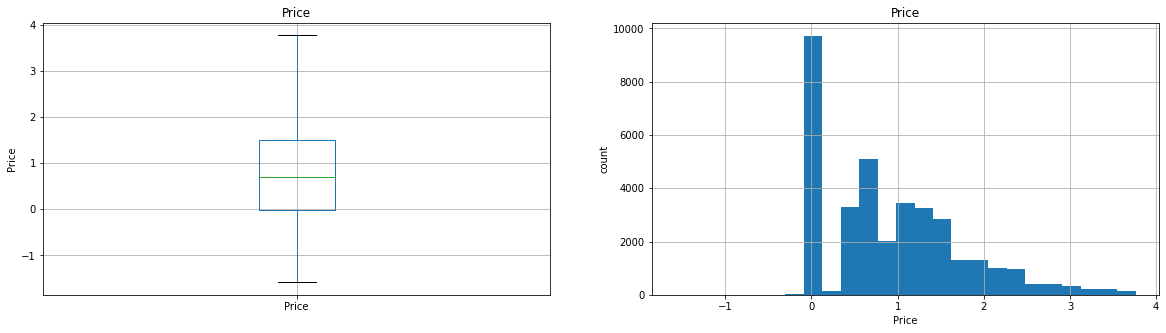

In [27]:
#np.warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,2,1)
price2 = price1.copy()
price2.boxplot(column='Price')
ax.set_ylabel('Price')
ax.set_title("Price")

ax = fig.add_subplot(1,2,2)
price2 = price1.copy()
price2[price2['Price'] !=0]['Price'].hist(bins=25)
ax.set_xlabel('Price')
ax.set_ylabel("count")
ax.set_title('Price')

plt.show()

Hence we got a result that we almost expected

In [28]:
price1

,Category,Free,Price,Size,Min_Version,Released_Before,Updated_Before,Content,Ad_Support,Inapp_Purchase,Min_Downloads,Average_Downloads
249,Tools,False,0.688135,0.470004,4.1,3.496508,3.367296,Everyone,False,False,10000,10.001612
267,Sports,False,1.607436,3.401197,7.1,4.007333,2.197225,Everyone,False,False,10000,9.230437
501,Education,False,1.095273,2.833213,4.4,3.988984,3.988984,Everyone,False,False,1,0.000000
559,Simulation,False,-0.010050,3.583519,4.4,2.302585,1.945910,Everyone,True,True,10000,9.730443
574,Education,False,0.688135,3.401197,2.3,4.219508,4.219508,Everyone,False,False,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2115805,Education,False,2.939352,4.454347,4.4,3.583519,2.197225,Everyone,False,False,1000,7.294377
2115806,Education,False,1.702928,2.397895,4.4,3.828641,3.367296,Everyone,False,False,5,1.791759
2115857,Personalization,False,0.398776,1.945910,4.1,4.663439,4.430817,Everyone,False,False,1000,7.152269
2115873,Role Playing,False,2.078191,3.850148,2.3,4.304065,4.304065,Teen,True,True,5000,8.674368


Merging it into the original data to proceed furthur for scaling

In [29]:
data1.loc[data1['Price'] != 0,'Price'] = price1['Price']

In [30]:
data1.isna().sum()

Category               0
Free                   0
Price                504
Size                   0
Min_Version            0
Released_Before        0
Updated_Before         0
Content                0
Ad_Support             0
Inapp_Purchase         0
Min_Downloads          0
Average_Downloads      0
dtype: int64

In [31]:
data1.dropna(axis=0,inplace=True)
data1.isna().sum()

Category             0
Free                 0
Price                0
Size                 0
Min_Version          0
Released_Before      0
Updated_Before       0
Content              0
Ad_Support           0
Inapp_Purchase       0
Min_Downloads        0
Average_Downloads    0
dtype: int64

# Feature Scaling

Using minmax scaler to all continuous features

In [32]:
feature_scale=continuous_feature_w_price

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data1[feature_scale])

data1 = pd.concat([data1[['Category','Min_Downloads',
 'Free',
 'Min_Version',
 'Content',
 'Ad_Support',
 'Inapp_Purchase']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data1[feature_scale]), columns=feature_scale)],
                    axis=1)
data1

,Category,Min_Downloads,Free,Min_Version,Content,Ad_Support,Inapp_Purchase,Price,Size,Released_Before,Updated_Before,Average_Downloads
0,Adventure,10,True,7.1,Everyone,False,False,0.296365,0.411020,0.438254,0.480305,0.160907
1,Tools,5000,True,5.0,Everyone,True,False,0.296365,0.190055,0.389918,0.074858,0.566803
2,Productivity,50,True,4.0,Everyone,False,False,0.296365,0.233542,0.515444,0.551717,0.258301
3,Communication,10,True,4.0,Everyone,True,False,0.296365,0.104922,0.618005,0.639270,0.170889
4,Tools,100,True,4.1,Everyone,False,False,0.296365,0.325689,0.438254,0.631728,0.366922
...,...,...,...,...,...,...,...,...,...,...,...,...
2115584,Education,1000,True,4.1,Everyone,True,False,0.296365,0.411020,0.647640,0.623960,0.473125
2115585,Education,100,True,4.1,Everyone,False,False,0.296365,0.675493,0.674447,0.692836,0.361308
2115586,Education,100,True,5.0,Everyone,False,False,0.296365,0.601075,0.625712,0.653730,0.324887
2115587,Music & Audio,1000,True,5.0,Everyone,True,False,0.296365,0.411020,0.766333,0.074858,0.485973


## Final Box plots and Histograms for Confirmation

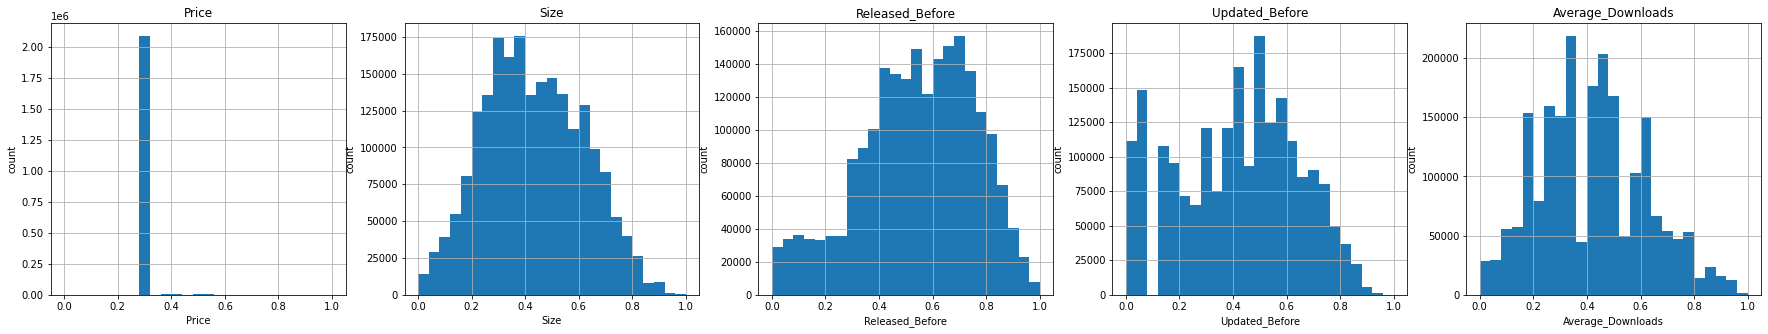

In [33]:
fig = plt.figure(figsize=(37,5))

for feature,i in zip(continuous_feature_w_price, range(1,7)):
    ax = fig.add_subplot(1,6,i)
    data1[feature].hist(bins=25)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.set_title(feature)

plt.show()

- comparing theprevious and present distribution diagram carefully, there is not change in the graph's skewness and the only change we are able to notice is **they all are scaled to the same unit**
    - which means the scaling is done as expected

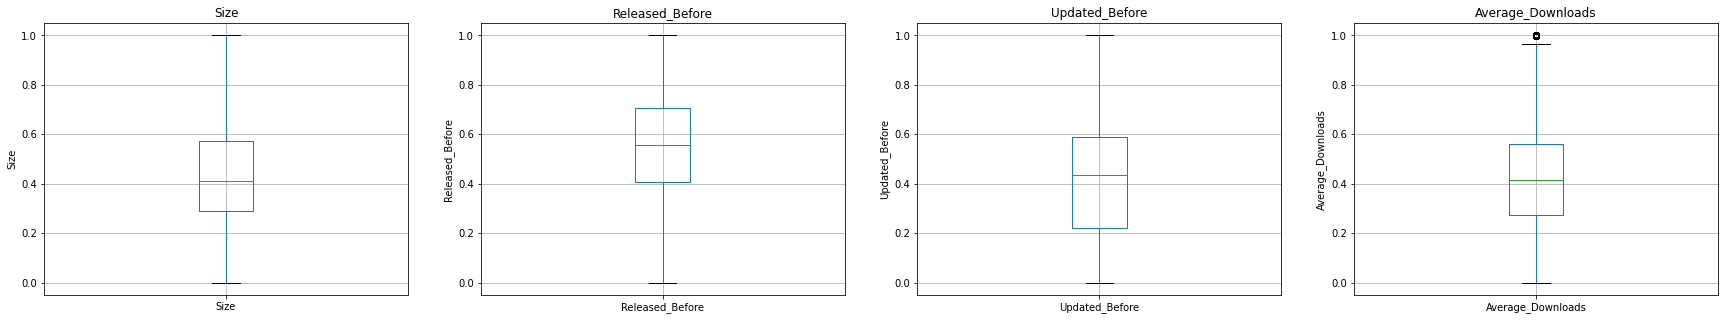

In [34]:
#np.warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(30,5))

for feature,i in zip(continuous_feature_wo_price, range(1,7)):
    ax = fig.add_subplot(1,4,i)
    dataset = data1.copy()
    dataset.boxplot(column=feature)
    ax.set_ylabel(feature)
    ax.set_title(feature)
    
plt.show()

- Another indication is that there is no difference in the previous and present box plot
- which means there is no increament of outliers while transforming

### Handling Rare categorical values

In [35]:
data1['Category'] = data1['Category'].str.replace('Music & Audio', 'Music')
data1['Category'] = data1['Category'].str.replace('Educational', 'Education')

In [36]:
data1['Category'].value_counts()

Education                  243879
Music                      152552
Business                   129571
Entertainment              129009
Tools                      125469
Lifestyle                  110805
Books & Reference          110466
Personalization             84325
Health & Fitness            76901
Productivity                69510
Food & Drink                68397
Shopping                    67878
Travel & Local              61699
Finance                     58474
Arcade                      49299
Puzzle                      45705
Casual                      45116
Communication               43356
Sports                      42841
Social                      41136
News & Magazines            39288
Photography                 33548
Medical                     28041
Action                      24182
Maps & Navigation           23459
Adventure                   21100
Simulation                  20477
Art & Design                17679
Auto & Vehicles             16047
House & Home  

- Taking away all categories which is less than 1 percent of data and changing them into a seperate category named **Rare_var***
- This is done because, the categories which are less than 1 percent of whole data is considered to not make much of any change to the model

In [37]:
temp=data1.groupby('Category')['Average_Downloads'].count()/len(data1)
temp_df=temp[temp>0.01].index
data1['Category']=np.where(data1['Category'].isin(temp_df),data1['Category'],np.nan)

In [38]:
data1['Category'].value_counts()

Education            243879
Music                152552
Business             129571
Entertainment        129009
Tools                125469
Lifestyle            110805
Books & Reference    110466
Personalization       84325
Health & Fitness      76901
Productivity          69510
Food & Drink          68397
Shopping              67878
Travel & Local        61699
Finance               58474
Arcade                49299
Puzzle                45705
Casual                45116
Communication         43356
Sports                42841
Social                41136
News & Magazines      39288
Photography           33548
Medical               28041
Action                24182
Maps & Navigation     23459
Name: Category, dtype: int64

In [39]:
data1.isna().sum()

Category             210683
Min_Downloads             0
Free                      0
Min_Version               0
Content                   0
Ad_Support                0
Inapp_Purchase            0
Price                     0
Size                      0
Released_Before           0
Updated_Before            0
Average_Downloads         0
dtype: int64

In [40]:
print(data1.shape)
data1.dropna(axis = 0,inplace=True)
data1.reset_index(drop=True,inplace=True)
print(data1.shape)
data1.isna().sum()

(2115589, 12)
(1904906, 12)


Category             0
Min_Downloads        0
Free                 0
Min_Version          0
Content              0
Ad_Support           0
Inapp_Purchase       0
Price                0
Size                 0
Released_Before      0
Updated_Before       0
Average_Downloads    0
dtype: int64

In [41]:
data1['Content'].value_counts()

Everyone           1682855
Teen                151561
Mature 17+           47000
Everyone 10+         23276
Unrated                110
Adults only 18+        104
Name: Content, dtype: int64

In [42]:
data1['Content'] = data1['Content'].replace('Unrated',"Everyone")

#Cleaning other values just to include Everyone, Teens and Adult 

data1['Content'] = data1['Content'].replace('Mature 17+',"Adults")
data1['Content'] = data1['Content'].replace('Adults only 18+',"Adults")
data1['Content'] = data1['Content'].replace('Everyone 10+',"Everyone")

In [43]:
data1['Content'].value_counts()

Everyone    1706241
Teen         151561
Adults        47104
Name: Content, dtype: int64

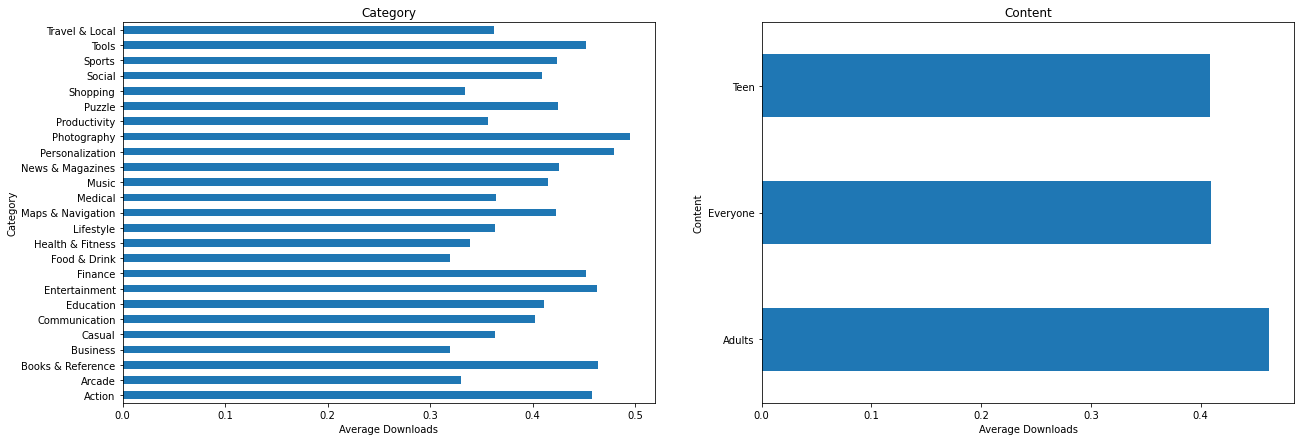

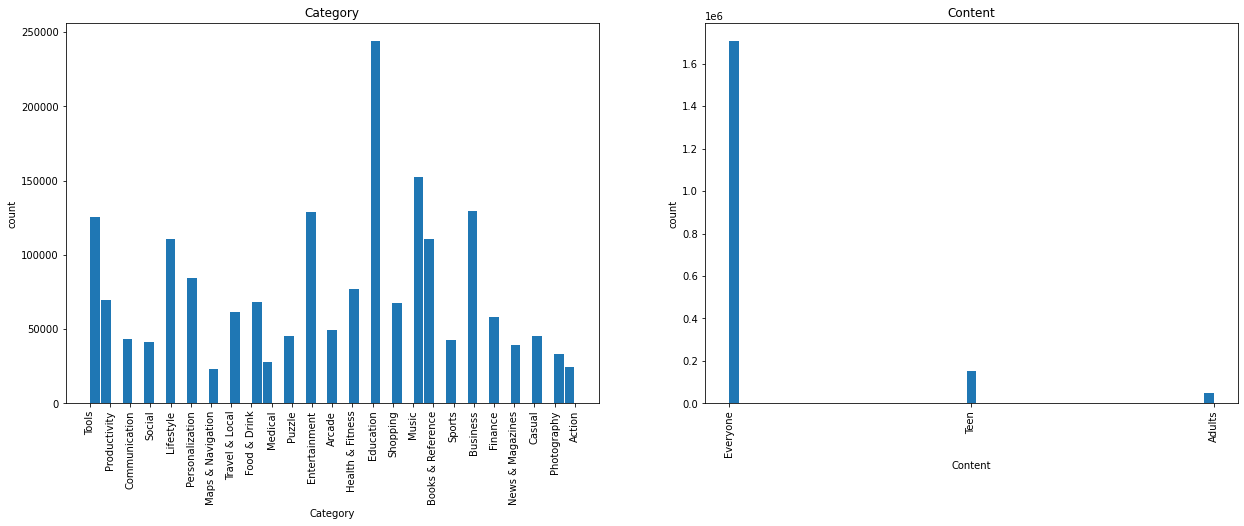

In [44]:
fig = plt.figure(figsize=(21,7))
for feature,i in zip(categorical_features, range(1,3)):
    ax = fig.add_subplot(1,2,i)
    dataset = data1.copy()
    dataset.groupby(feature)['Average_Downloads'].median().plot.barh() #Plot against average downloads (median) with categorical features
    ax.set_ylabel(feature)
    ax.set_xlabel("Average Downloads")
    ax.set_title(feature)
 
fig = plt.figure(figsize=(21,7))
for feature,i in zip(categorical_features, range(1,3)):
    ax = fig.add_subplot(1,2,i)
    dataset = data1.copy()
    dataset[feature].hist(bins=45,rwidth = 0.9)
    ax.set_xlabel(feature)
    ax.set_ylabel("count")
    ax.grid(False)
    ax.xaxis.set_tick_params(rotation =90)
    ax.set_title(feature)

plt.show()

Now the plots are evenly distributed comparing the other plot we made in the beginning

In [45]:
data1['Min_Downloads'].value_counts()

100        380607
1000       336409
10         255380
10000      208202
500        161405
50         146282
5000       119183
100000      82014
5           61904
50000       59041
1           53876
1000000     21862
500000      18486
5000000       255
Name: Min_Downloads, dtype: int64

In [46]:
data1

,Category,Min_Downloads,Free,Min_Version,Content,Ad_Support,Inapp_Purchase,Price,Size,Released_Before,Updated_Before,Average_Downloads
0,Tools,5000,True,5.0,Everyone,True,False,0.296365,0.190055,0.389918,0.074858,0.566803
1,Productivity,50,True,4.0,Everyone,False,False,0.296365,0.233542,0.515444,0.551717,0.258301
2,Communication,10,True,4.0,Everyone,True,False,0.296365,0.104922,0.618005,0.639270,0.170889
3,Tools,100,True,4.1,Everyone,False,False,0.296365,0.325689,0.438254,0.631728,0.366922
4,Social,50,True,6.0,Teen,False,True,0.296365,0.683427,0.593532,0.506348,0.274174
...,...,...,...,...,...,...,...,...,...,...,...,...
1904901,Education,5,True,4.4,Everyone,False,False,0.296365,0.336849,0.452681,0.493652,0.116023
1904902,Education,1000,True,4.1,Everyone,True,False,0.296365,0.411020,0.647640,0.623960,0.473125
1904903,Education,100,True,4.1,Everyone,False,False,0.296365,0.675493,0.674447,0.692836,0.361308
1904904,Education,100,True,5.0,Everyone,False,False,0.296365,0.601075,0.625712,0.653730,0.324887


<AxesSubplot:>

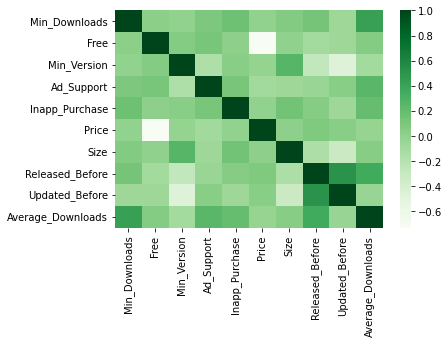

In [47]:
sns.heatmap(data1.corr(), cmap="Greens", annot=False)

In [48]:
data1.to_csv('google-playstore-apps/Google-Playstore-Transformed.csv.gz',compression='gzip',index= False)